#Project - Chandrayan 3

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DataFrame = pd.read_csv("propulsion_module.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'propulsion_module.csv'

In [8]:
DataFrame

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solistices and with bias"
7,Communication,S-Band Transponder (TTC) – with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


###Data Cleaning

**Making 3 parts of data**

In [9]:
data = {

"Parameter": [

"Lunar Polar Orbit",

"Mission life",

"Structure",

"Dry Mass",

"Propellant Mass",

"Total PM Mass",

"Power Generation",

"Communication",

"Attitude Sensors",

"Propulsion System"],

"Specifications": [

"From 170 x 36500 km to lunar polar orbit",

"Carrying Lander Module & Rover upto ~100 x 100 km launch injection.",

"Modified version of 1-3 К",

"448.62 kg (including pressurant)",

"1696.39 kg",

"2145.01 kg",

"738 W, Summer solstices and with bias",

"S-Band Transponder (TTC) with IDSN",

"CASS, IRAP, Micro star sensor",

"Bi-Propellant Propulsion System (MMH + MON3)"
]

}

In [10]:
propulsion_df = pd.DataFrame(data)

In [11]:
propulsion_df

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of 1-3 К
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solstices and with bias"
7,Communication,S-Band Transponder (TTC) with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


In [12]:
data = {

"Parameter": [

"Mission life",

"Mass",

"Power",

"Payloads",

"Dimensions (mm3)",

"Communication",

"Landing site"
],

"Specifications": [

"1 Lunar day (14 Earth days)",

"1749.86 kg including Rover",

"738 W (Winter solstice)",

"3",

"2000 x 2000 x 1166",

"ISDN, Ch-2 Orbiter, Rover",

"69.367621 S, 32.348126 F"

]

}


In [13]:
lander_df = pd.DataFrame(data)

In [14]:
lander_df

,Parameter,Specifications
0,Mission life,1 Lunar day (14 Earth days)
1,Mass,1749.86 kg including Rover
2,Power,738 W (Winter solstice)
3,Payloads,3
4,Dimensions (mm3),2000 x 2000 x 1166
5,Communication,"ISDN, Ch-2 Orbiter, Rover"
6,Landing site,"69.367621 S, 32.348126 F"


In [15]:
data = {

"Parameter": [

"Mission Life",

"Mass",

"Power",

"Payloads",

"Dimensions (mm3)",

"Communication"

],

"Specifications": [

"1 Lunar day",

"26 kg",

"50 W",

"2",

"917 x 750 x 397",

"Lander"

]

}

In [16]:
rover_df = pd.DataFrame(data)

In [17]:
rover_df

,Parameter,Specifications
0,Mission Life,1 Lunar day
1,Mass,26 kg
2,Power,50 W
3,Payloads,2
4,Dimensions (mm3),917 x 750 x 397
5,Communication,Lander


Regular Expression is used to find the pattern among a text.

In [18]:
import re

In [22]:
def extract_numerical_value(spec):
  numerical_pattern = r'(\d+(\.\d+)?)'
  custom_numeric_pattern = r'[+-]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][+-]?\d+)?'
  combined_pattern = f"({numerical_pattern}|{custom_numeric_pattern})"
  matches = re.findall(combined_pattern, spec)
  if matches:
    return float (matches[0][0])
  else:
    return None

In [23]:
propulsion_df["numerical value"] = propulsion_df["Specifications"].apply(extract_numerical_value)

In [24]:
propulsion_df

,Parameter,Specifications,numerical value
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit,170.00
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...,100.00
2,Structure,Modified version of 1-3 К,1.00
3,Dry Mass,448.62 kg (including pressurant),448.62
4,Propellant Mass,1696.39 kg,1696.39
5,Total PM Mass,2145.01 kg,2145.01
6,Power Generation,"738 W, Summer solstices and with bias",738.00
7,Communication,S-Band Transponder (TTC) with IDSN,NaN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor",NaN
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3),3.00


In [25]:
lander_df["numerical value"] = lander_df["Specifications"].apply(extract_numerical_value)

In [26]:
lander_df

,Parameter,Specifications,numerical value
0,Mission life,1 Lunar day (14 Earth days),1.000000
1,Mass,1749.86 kg including Rover,1749.860000
2,Power,738 W (Winter solstice),738.000000
3,Payloads,3,3.000000
4,Dimensions (mm3),2000 x 2000 x 1166,2000.000000
5,Communication,"ISDN, Ch-2 Orbiter, Rover",-2.000000
6,Landing site,"69.367621 S, 32.348126 F",69.367621


In [27]:
rover_df["numerical value"] = rover_df["Specifications"].apply(extract_numerical_value)

In [28]:
rover_df

,Parameter,Specifications,numerical value
0,Mission Life,1 Lunar day,1.0
1,Mass,26 kg,26.0
2,Power,50 W,50.0
3,Payloads,2,2.0
4,Dimensions (mm3),917 x 750 x 397,917.0
5,Communication,Lander,NaN


In [29]:
import math

In [30]:
rover_mass = 26
lander_dry_mass = 1749.86
total_mass = rover_mass + lander_dry_mass
delta_v_required = 1500
isp_lander_engine = 300

propellant_mass_required = total_mass * math.exp(delta_v_required / isp_lander_engine)
propellant_mass_required = round(propellant_mass_required, 2)

In [31]:
rover_power_requirement = 50
lander_battery_capacity = 2000

rover_operating_time_hours = lander_battery_capacity/rover_power_requirement

In [33]:
print("Mass Budget: ")
print(f"Lander mass: {lander_dry_mass} kg")
print(f"Rover mass: {rover_mass} kg")
print(f"Propellant mass required: {propellant_mass_required} kg")

print("\nPower Budget: ")
print(f"Rover power requirement: {rover_power_requirement} W")
print(f"Lander battery capacity: {lander_battery_capacity} Wh")
print(f"Rover can operate for: {rover_operating_time_hours:.2f} hours on stored battery")

print("\nMobility Assesment: ")
print("Low mass of the rover allows for mobility on uneven lunar surface")
print("Number of payload for science measurement is 2")

Mass Budget: 
Lander mass: 1749.86 kg
Rover mass: 26 kg
Propellant mass required: 263560.99 kg

Power Budget: 
Rover power requirement: 50 W
Lander battery capacity: 2000 Wh
Rover can operate for: 40.00 hours on stored battery

Mobility Assesment: 
Low mass of the rover allows for mobility on uneven lunar surface
Number of payload for science measurement is 2


###Visualization

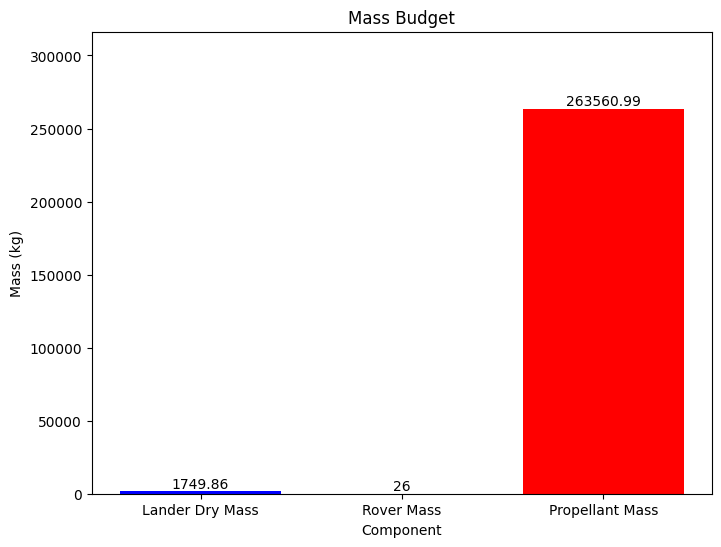

In [34]:
labels = ['Lander Dry Mass','Rover Mass','Propellant Mass']
mass_values = [lander_dry_mass,rover_mass,propellant_mass_required]

plt.figure(figsize=(8, 6))
plt.bar(labels, mass_values, color=['blue', 'green', 'red'])
plt.xlabel('Component')
plt.ylabel('Mass (kg)')
plt.title('Mass Budget')
plt.ylim(0,max(mass_values)*1.2)

for i,v in enumerate(mass_values):
  plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

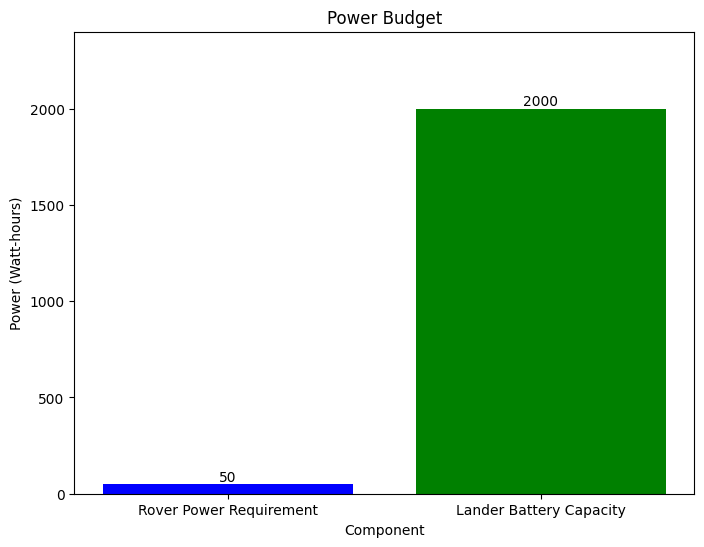

In [37]:
labels = ['Rover Power Requirement','Lander Battery Capacity']
power_values = [rover_power_requirement,lander_battery_capacity]

plt.figure(figsize=(8, 6))
plt.bar(labels, mass_values, color=['blue', 'green', 'red'])
plt.xlabel('Component')
plt.ylabel('Power (Watt-hours)')
plt.title('Power Budget')
plt.ylim(0,max(mass_values)*1.2)

for i,v in enumerate(power_values):
  plt.text(i,v,str(v),ha='center',va='bottom')

plt.show()

In [40]:
import plotly.express as px

mass_labels = ['Lander Dry Mass','Rover Mass','Propellant Mass']
mass_values = [lander_dry_mass,rover_mass,propellant_mass_required]

mass_fig = px.bar(x=mass_labels, y=mass_values, labels={'x':'Component', 'y':'Mass (kg)'},title='Max Budget',color=mass_labels)
mass_fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

mass_fig.show()

In [41]:
power_labels = ['Rover Power Requiremet','Lander Battery Capacity']
power_values = [rover_power_requirement,lander_battery_capacity]

mass_fig = px.bar(x=power_labels, y=power_values, labels={'x':'Component', 'y':'Mass (kg)'},title='Max Budget',color=power_labels)
mass_fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

mass_fig.show()

In [42]:
mass_fig = px.pie(names=mass_labels, values=mass_values, title='Mass Budget')
mass_fig.show()

In [43]:
power_fig = px.pie(names=power_labels, values=power_values, title='Power Budget')
power_fig.show()

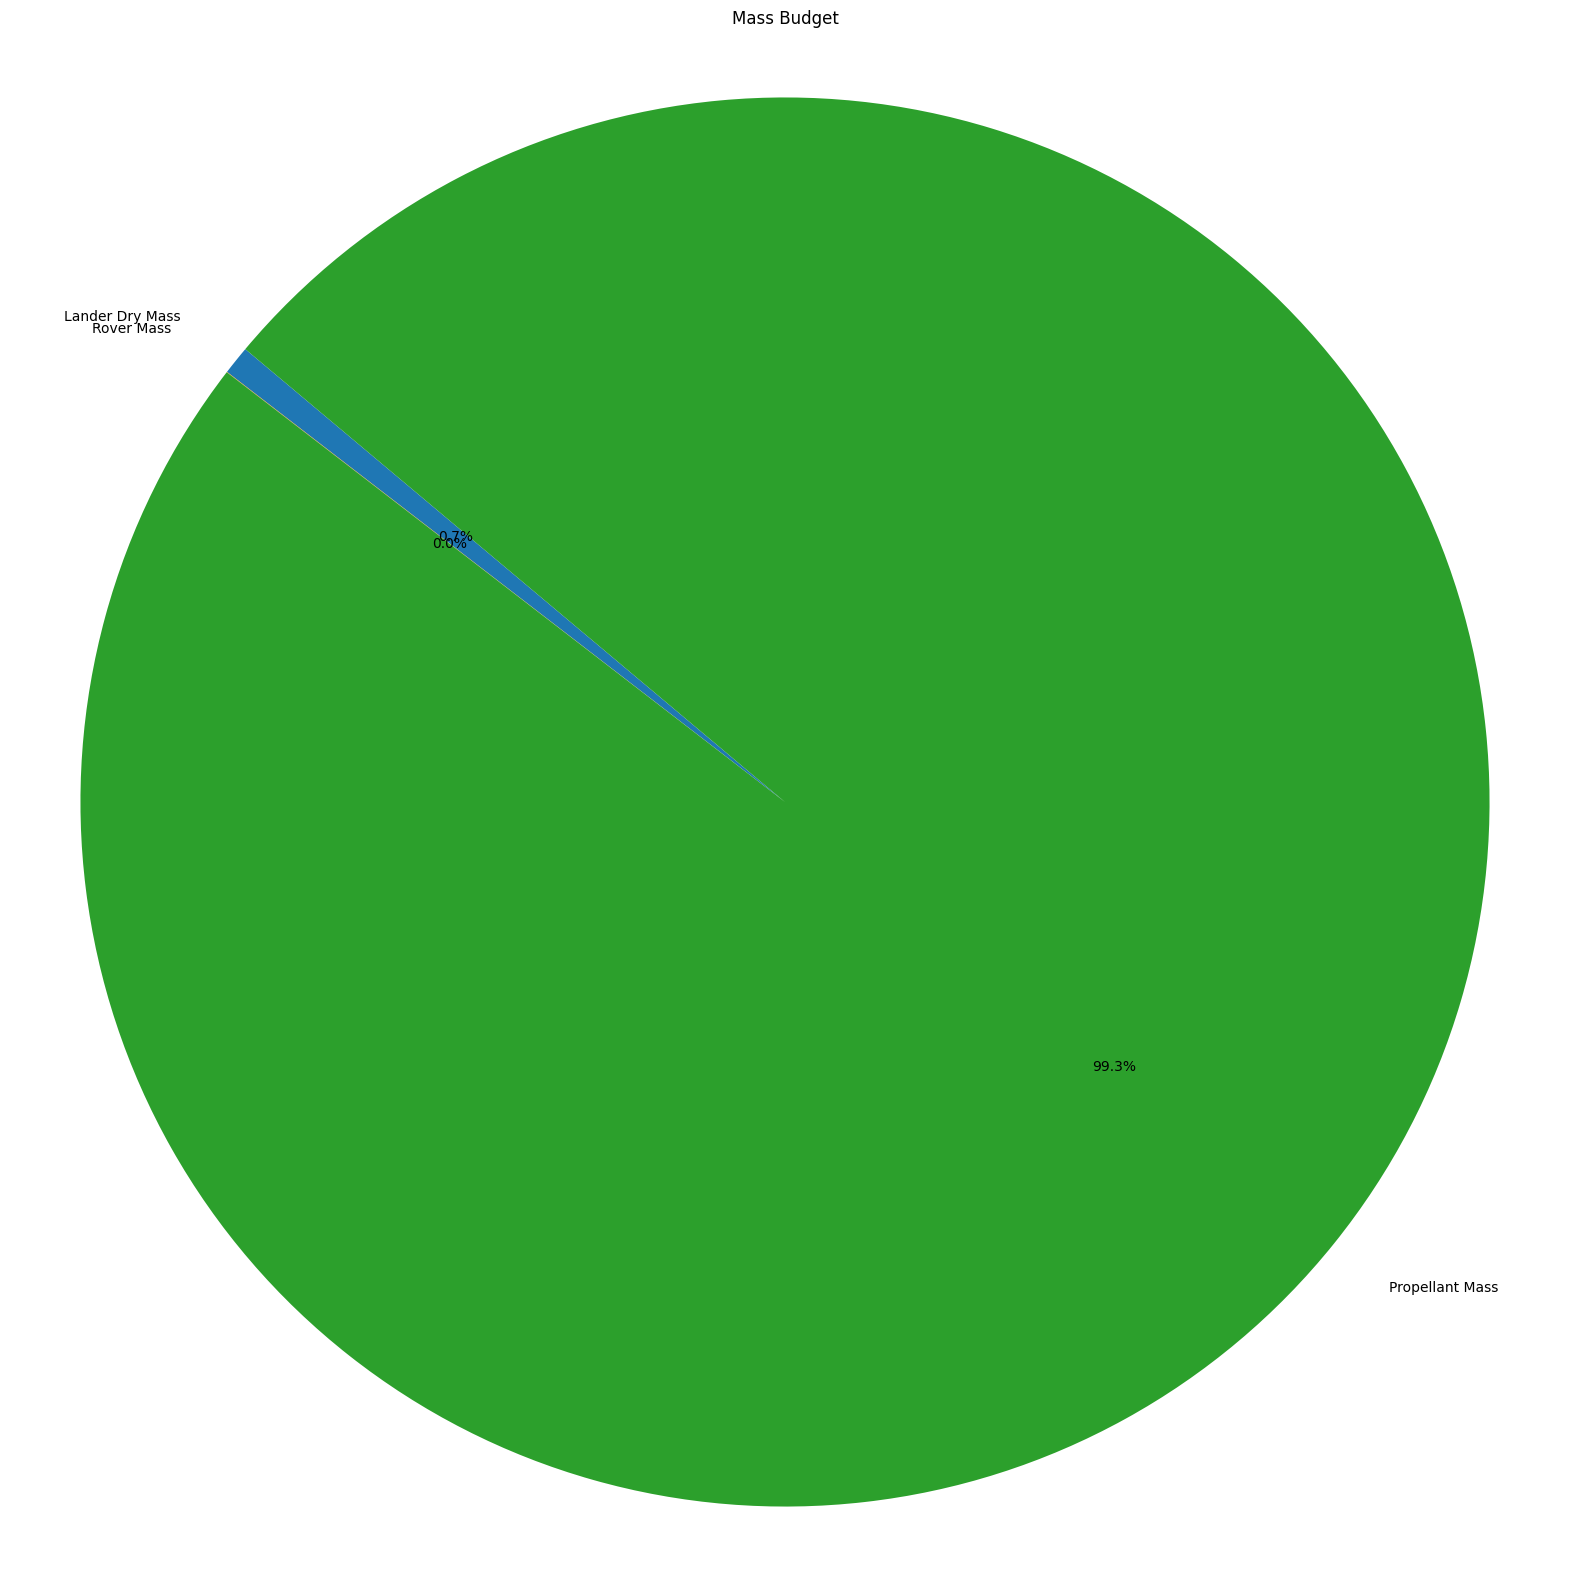

In [44]:
plt.figure(figsize=(20,20))
plt.pie(mass_values,labels=mass_labels,autopct='%1.1f%%',startangle=140)
plt.title('Mass Budget')
plt.axis('equal')
plt.show()

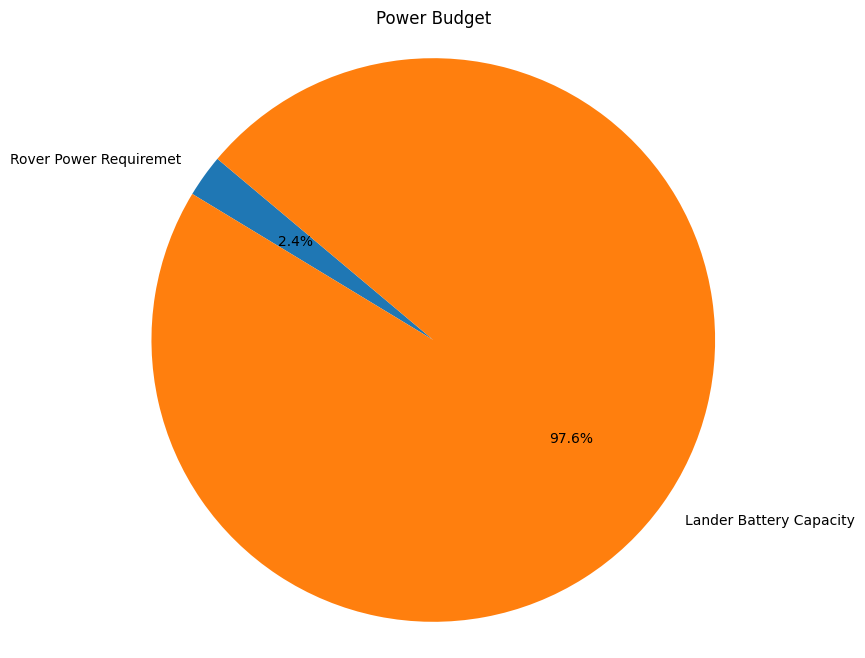

In [45]:
plt.figure(figsize=(8,8))
plt.pie(power_values,labels=power_labels,autopct='%1.1f%%',startangle=140)
plt.title('Power Budget')
plt.axis('equal')
plt.show()